In [1]:
# Before you proceed, update the PATH
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.6/site-packages"
# Restart the Kernel at this point. 

In [2]:
# Do not execute the commands below unless you have restart the Kernel after updating the PATH. 
!python -m pip install torch==1.0.0

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement torch==1.0.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2)
ERROR: No matching distribution found for torch==1.0.0


In [2]:
# Check torch version and CUDA status if GPU is enabled.
import torch
print(torch.__version__)
print(torch.cuda.is_available()) # Should return True when GPU is enabled. 

2.1.2+cpu
False


In [3]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [4]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [5]:
# Define your transforms for the training, validation, and testing sets
data_transforms = {
    'train': transforms.Compose([transforms.RandomRotation(30),
                                 transforms.RandomResizedCrop(224),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406],
                                                      [0.229, 0.224, 0.225])]),
    'test': transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],
                                                     [0.229, 0.224, 0.225])])
}

data_dir = 'flowers'
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'
valid_dir= data_dir + '/valid'

# Load the datasets with ImageFolder
image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'test': datasets.ImageFolder(test_dir, transform=data_transforms['test']),
    'valid': datasets.ImageFolder(valid_dir, transform=data_transforms['test'])
}

# Using the image datasets and the transforms, define the dataloaders
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=64, shuffle=True),
    'test': torch.utils.data.DataLoader(image_datasets['test'], batch_size=64),
    'valid': torch.utils.data.DataLoader(image_datasets['valid'], batch_size=64) 
}

In [6]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [7]:
#Build and train network
model = models.vgg16(pretrained=True)
model

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
print(len(cat_to_name))

102


In [8]:
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(nn.Linear(25088, 512),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(512,256),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(256, len(cat_to_name)),
                           nn.LogSoftmax(dim=1))
    
    
model.classifier = classifier
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.0025)

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Testing and training network

In [9]:
epochs = 5
steps = 0
running_loss = 0
print_every = 20

for epoch in range(epochs):
    for inputs, labels in dataloaders['train']:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in dataloaders['valid']:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()
                
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"valid loss: {test_loss/len(dataloaders['valid']):.3f}.. "
                  f"valid accuracy: {accuracy/len(dataloaders['valid']):.3f}")
            running_loss = 0
            model.train()

Epoch 1/5.. Train loss: 4.655.. valid loss: 3.867.. valid accuracy: 0.139
Epoch 1/5.. Train loss: 3.697.. valid loss: 2.648.. valid accuracy: 0.390
Epoch 1/5.. Train loss: 2.997.. valid loss: 1.931.. valid accuracy: 0.516
Epoch 1/5.. Train loss: 2.574.. valid loss: 1.768.. valid accuracy: 0.542
Epoch 1/5.. Train loss: 2.266.. valid loss: 1.460.. valid accuracy: 0.597
Epoch 2/5.. Train loss: 2.138.. valid loss: 1.219.. valid accuracy: 0.662
Epoch 2/5.. Train loss: 1.966.. valid loss: 1.167.. valid accuracy: 0.682
Epoch 2/5.. Train loss: 1.951.. valid loss: 1.099.. valid accuracy: 0.685
Epoch 2/5.. Train loss: 1.809.. valid loss: 1.116.. valid accuracy: 0.690
Epoch 2/5.. Train loss: 1.737.. valid loss: 1.037.. valid accuracy: 0.702
Epoch 3/5.. Train loss: 1.706.. valid loss: 1.096.. valid accuracy: 0.710
Epoch 3/5.. Train loss: 1.728.. valid loss: 1.101.. valid accuracy: 0.693
Epoch 3/5.. Train loss: 1.704.. valid loss: 1.012.. valid accuracy: 0.707
Epoch 3/5.. Train loss: 1.675.. valid 

In [10]:
# Validation on the test set
test_loss = 0
test_accuracy = 0
model.eval() # We just want to evaluate and not train the model
with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)

        logps = model.forward(inputs)
        batch_loss = criterion(logps, labels)
        test_loss += batch_loss.item()

        # Calculate accuracy of test set
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

print(f"Test loss: {test_loss/len(dataloaders['test']):.3f}, "
      f"Test accuracy: {test_accuracy/len(dataloaders['test']):.3f}")
running_loss = 0

Test loss: 0.825, Test accuracy: 0.766


## Save the checkpoint

In [11]:
#Save the checkpoint 
model.class_to_idx = image_datasets['train'].class_to_idx
checkpoint = {'state_dict': model.state_dict(),
              'class_to_idx': model.class_to_idx,
              'optimizer_state_dict': optimizer.state_dict(),
              'classifier': model.classifier}

torch.save(checkpoint, 'checkpoint.pth')

## Loading the checkpoint


In [12]:
#function that loads a checkpoint and rebuilds the model
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = models.vgg16(pretrained=True)
    model.classifier = checkpoint['classifier']
    model.load_state_dict(checkpoint['state_dict'])
    model.class_to_idx = checkpoint['class_to_idx']
    
    return model

model = load_checkpoint('checkpoint.pth')
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Inference for classification


In [13]:
from PIL import Image
import numpy as np

def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model. '''
    image = Image.open(image_path)
    
    # Resize and crop
    image = image.resize([256, 256]).crop((16, 16, 240, 240))
    
    np_image = np.array(image) / 255
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = ((np_image - mean) / std)
    np_image = np_image.transpose((2, 0, 1))

    return np_image

    
    
    

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your `process_image` function works, running the output through this function should return the original image (except for the cropped out portions).

In [14]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

## Class Prediction


In [15]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model. '''
    
    model.eval()
    image = process_image(image_path)
    image = torch.from_numpy(image).type(torch.FloatTensor)
    image = image.unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(topk, dim=1)

        # Convert indices to classes
        idx_to_class = {val: key for key, val in model.class_to_idx.items()}
        top_class = [idx_to_class[each] for each in top_class.cpu().numpy()[0]]
        top_p = top_p.cpu().numpy()[0]

    return top_p, top_class

In [16]:
# Displaying an image along with the top 5 classes

def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # Convert from Tensor image
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    if title:
        ax.set_title(title)
    ax.axis('off')

    return ax

(0.0, 1.1)

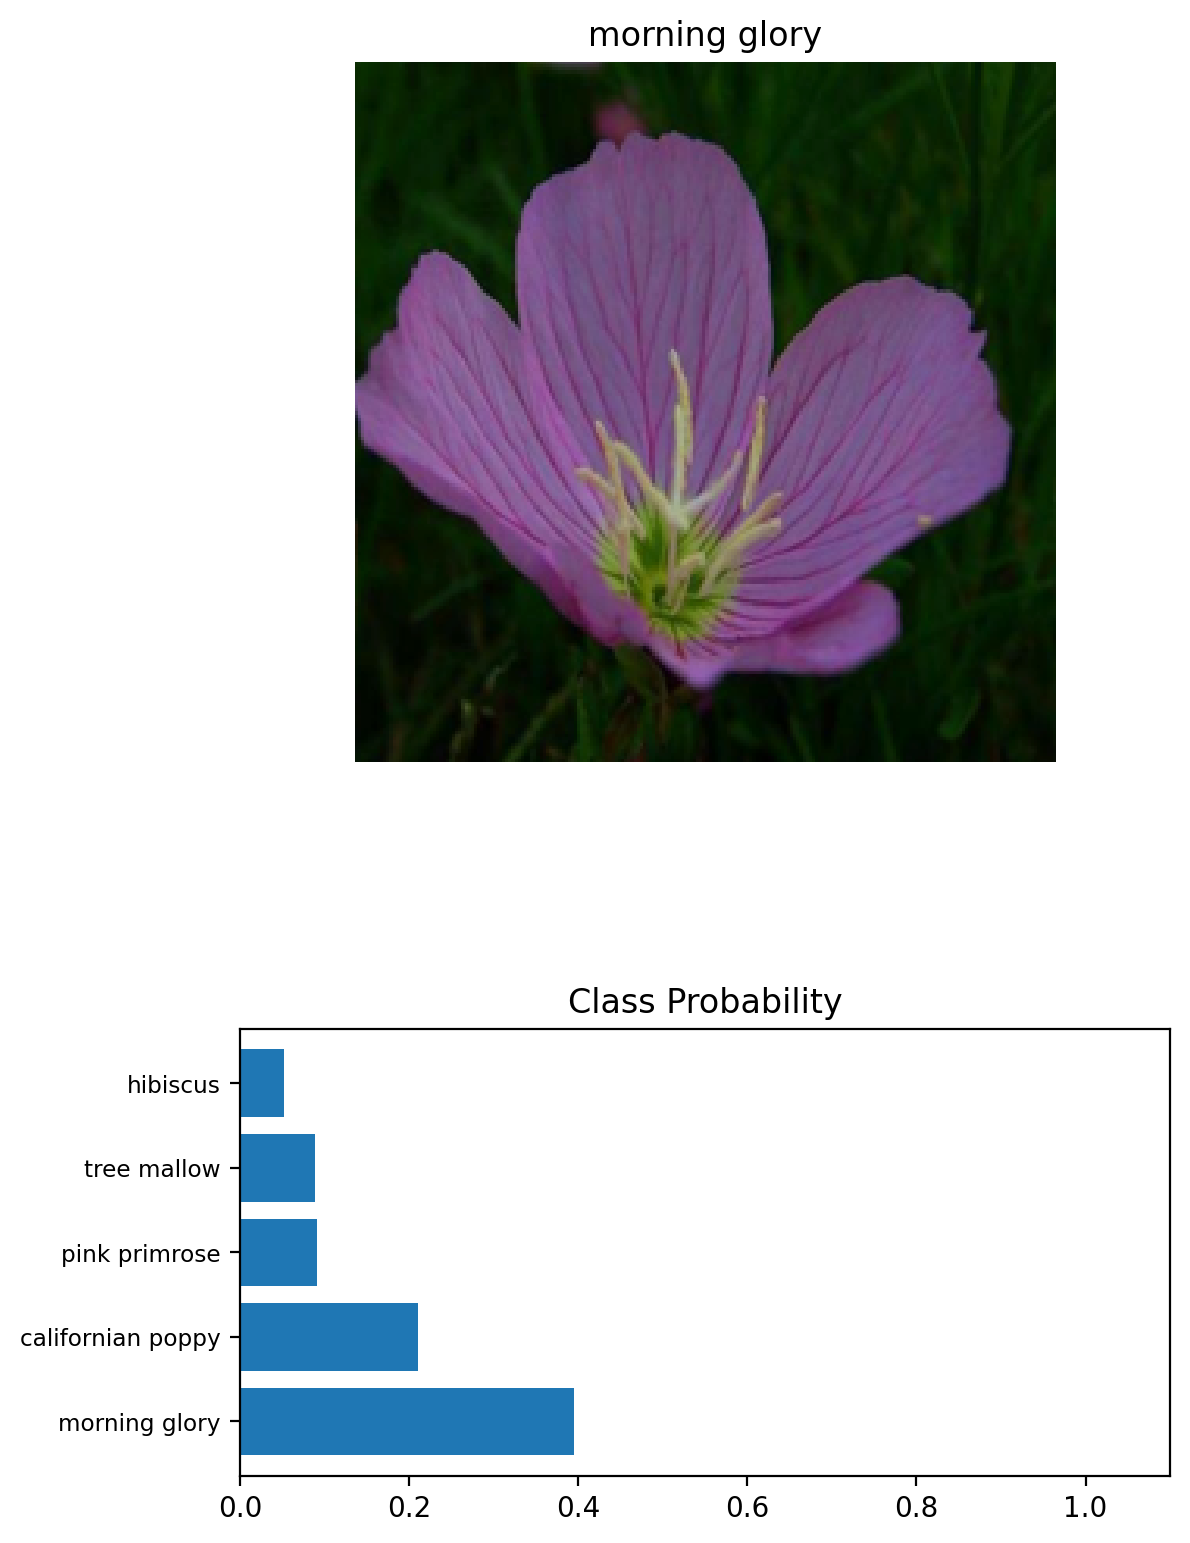

In [17]:
image_path = "flowers/test/1/image_06752.jpg"
probs, classes = predict(image_path, model)
image = process_image(image_path)

plt.figure(figsize=(6,10))
ax = plt.subplot(2,1,1)

# Plot flower
img = torch.from_numpy(image)
title = cat_to_name[str(classes[0])] if classes[0] in cat_to_name else "Unknown"
imshow(img, ax, title)

# Plot probabilities
ax = plt.subplot(2,1,2)
ax.barh(np.arange(len(classes)), probs)
ax.set_aspect(0.1)
ax.set_yticks(np.arange(len(classes)))
ax.set_yticklabels([cat_to_name[str(cls)] if cls in cat_to_name else "Unknown" for cls in classes], size='small');
ax.set_title('Class Probability')
ax.set_xlim(0, 1.1)

## Reminder for Workspace users
If your network becomes very large when saved as a checkpoint, there might be issues with saving backups in your workspace. You should reduce the size of your hidden layers and train again. 
    
We strongly encourage you to delete these large interim files and directories before navigating to another page or closing the browser tab.

In [20]:
# TODO remove .pth files or move it to a temporary `~/opt` directory in this Workspace
import shutil
source_dir = '.'
dest_dir = '~/opt' 

if os.path.exists(dest_dir):
    shutil.rmtree(dest_dir)
os.makedirs(dest_dir)
for file in os.listdir(source_dir):
    if file.endswith('.pth'):
        shutil.move(os.path.join(source_dir, file), dest_dir)
        print(f"Moved {file} to {dest_dir}")

Moved checkpoint.pth to ~/opt
